<a href="https://colab.research.google.com/github/pacastl/PruebaIA/blob/main/Comparativa_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. Entrenando distintos algoritmos y seleccionando los hiperparámetros

##### Ejercicio
Carga las distintas librerías que son necesarias para los clasificadores definidos en la práctica 5. En concreto vas a construir clasificadores utilizando los algoritmos:
 - KNN
 - Árboles de decisión
 - Regresión logística
 - SVM
 - Redes neuronales

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
import numpy as np
import pandas as pd
# url del repositorio de github para poder leerlos
url_train = 'https://raw.githubusercontent.com/pacastl/PruebaIA/main/train.csv'
url_test = 'https://raw.githubusercontent.com/pacastl/PruebaIA/main/test.csv'

# Leemos los CSV como Pandas DataFrames
train = pd.read_csv(url_train)
#test = pd.read_csv(url_test)

#otra forma de leerlos porque los descargué en mi pc
train_file = r'C:\Users\Pablo\Downloads\train.csv'
test_file = r'C:\Users\Pablo\Downloads\test.csv'

#df = pd.read_csv(train_file)

Partimos el datsaet

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = train.drop('ACTIVITY', axis=1)
y = train['ACTIVITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Iniciamos los clasificadores

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
svm = SVC()
nn = MLPClassifier()


Encuentra los mejores hiperparámetros (combina el k-fold cross validation con técnicas de búsqueda como el GridSearch o RandomSearch)

Para KNN (y lo entrena también)

In [16]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a 5-fold cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Train the KNN classifier with the best hyperparameters on the entire training data
knn = KNeighborsClassifier(**grid.best_params_)
knn.fit(X_train, y_train)


Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best score: 0.6216275838110127


KNeighborsClassifier(weights='distance')

Para árboles de decisión

In [4]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 8]}

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Create a 5-fold cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid = GridSearchCV(dt, param_grid, cv=cv, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Train the Decision Tree Classifier with the best hyperparameters on the entire training data
dt = DecisionTreeClassifier(**grid.best_params_)
dt.fit(X_train, y_train)


Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.672883011985409


DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

Para regresión logística

In [ ]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
import warnings

# Define the parameter grid
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100, 1000, 10000],
              'tol': [1e-4, 1e-3, 1e-2]}

# Create a Logistic Regression Classifier
lr = LogisticRegression(random_state=42)

# Create a 5-fold cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid = GridSearchCV(lr, param_grid, cv=cv, scoring='accuracy')

# Fit the GridSearchCV object to the training data
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Train the Logistic Regression Classifier with the best hyperparameters on the entire training data
lr = LogisticRegression(**grid.best_params_, max_iter=10000, warm_start=True)
lr.fit(X_train, y_train)




/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

Para SVM

In [ ]:
#Tarda demasiado
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'degree': [2, 3, 4],
              'gamma': ['scale', 'auto']}

# Create an SVM Classifier
svm = SVC(random_state=42)

# Create a 5-fold cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Train the SVM Classifier with the best hyperparameters on the entire training data
svm = SVC(**grid.best_params_)
svm.fit(X_train, y_train)


Para redes neuronales

In [5]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {'hidden_layer_sizes': [(10,), (50,), (100,)], 
              'activation': ['logistic', 'tanh', 'relu'], 
              'alpha': [0.0001, 0.001, 0.01, 0.1]}

# Create a neural network classifier
nn = MLPClassifier(max_iter=500, random_state=42)

# Create a 5-fold cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid = GridSearchCV(nn, param_grid, cv=cv, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Train the neural network with the best hyperparameters on the entire training data
nn = MLPClassifier(max_iter=500, **grid.best_params_, random_state=42)
nn.fit(X_train, y_train)


Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Best score: 0.32482646126454756


MLPClassifier(activation='logistic', max_iter=500, random_state=42)

Ahora comparamos para ver cuál es el mejor

In [ ]:
# Evaluate the performance of each classifier on the testing data
logistic_regression_score = logistic_regression.score(X_test, y_test)
decision_tree_score = decision_tree.score(X_test, y_test)
svm_score = svm.score(X_test, y_test)
knn_score = knn.score(X_test, y_test)
neural_network_score = neural_network.score(X_test, y_test)

# Print the scores
print("Logistic Regression Score:", logistic_regression_score)
print("Decision Tree Score:", decision_tree_score)
print("SVM Score:", svm_score)
print("KNN Score:", knn_score)
print("Neural Network Score:", neural_network_score)


################### A parti der aqui pachucho

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Split the data into features (X) and target variable (y)
X_train = train.drop("ACTIVITY", axis=1)
y_train = train["ACTIVITY"]
y_test = test['ACTIVITY']
X_test = test

# Step 2: Initialize the classifiers
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()

# Step 3: Train each classifier using the training dataset
dt_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

# Step 4: Use each trained classifier to predict the target variable for the test dataset
dt_pred = dt_clf.predict(X_test)
knn_pred = knn_clf.predict(X_test)

# Step 5: Evaluate the performance of each classifier using some metrics
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='weighted')
dt_rec = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='weighted')
knn_rec = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

# Print the results
print("Decision Tree Classifier:")
print("Accuracy: {:.2f}".format(dt_acc))
print("Precision: {:.2f}".format(dt_prec))
print("Recall: {:.2f}".format(dt_rec))
print("F1 Score: {:.2f}".format(dt_f1))

print("\nK-Nearest Neighbors Classifier:")
print("Accuracy: {:.2f}".format(knn_acc))
print("Precision: {:.2f}".format(knn_prec))
print("Recall: {:.2f}".format(knn_rec))
print("F1 Score: {:.2f}".format(knn_f1))


KeyError: ignored

**KNN**

Empezamos ajustando los hiperparámetros del algoritmo KNN propbando con valores de k entre 1  y 25.

In [3]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos probar
param_grid = {'n_neighbors': np.arange(1, 26, 2)}

# Creamos el modelo
modelKNN = KNeighborsClassifier()

# Realizamos la búsqueda de los mejores hiperparámetros utilizando validación cruzada
grid = GridSearchCV(modelKNN, param_grid, cv=5)
grid.fit(trainData, trainLabels)

# Mostramos los mejores hiperparámetros y su puntuación en la validación cruzada
print("Mejores hiperparámetros: {}".format(grid.best_params_))
print("Mejor precisión de validación cruzada: {:.2f}%".format(grid.best_score_ * 100))

# Obtenemos la precisión en el conjunto de test utilizando los mejores hiperparámetros
best_modelKNN = grid.best_estimator_
score = best_modelKNN.score(testData, testLabels)
print("Precisión en conjunto de test: {:.2f}%".format(score * 100))


NameError: ignored

##### Pregunta
Entre los valores anteriores, ¿con qué valor de k obtenemos mejor precisión?

Respuesta: Con los valores 3 y 7 con un 77.59%

**Árboles de decisión**

Repite lo mismo visto para KNN para los árboles de decisión con el hiperparámetro min_samples_split con valores entre 2 y 10 avanzando de 1 en 1. Puedes ver lo que hace este hiperparámetro en la [documentación de sklearn](http://scikit-learn.org/stable/modules/tree.html).


In [ ]:
for k in range(2,10,1):
    modelArbol = DecisionTreeClassifier(min_samples_split=k)
    modelArbol.fit(trainData, trainLabels)
    score = modelArbol.score(valData,valLabels)
    print("k=%d, precision=%.2f%%" % (k, score * 100))


k=2, precision=62.07%
k=3, precision=62.07%
k=4, precision=63.79%
k=5, precision=65.52%
k=6, precision=63.79%
k=7, precision=62.07%
k=8, precision=63.79%
k=9, precision=62.07%


**Regresión logística**

Repite lo mismo visto para KNN para la regresión logística con C tomando los valores 0.1,1,10,100, y 1000.

In [ ]:
values=[0.1 , 1 , 10 , 100 , 1000]
for k in values:
    modelLR = LogisticRegression(C=k)
    modelLR.fit(trainData,trainLabels)
    score=modelLR.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=0, precisión=74.14%
k=1, precisión=72.41%
k=10, precisión=72.41%
k=100, precisión=70.69%
k=1000, precisión=72.41%


##### Pregunta
Entre los valores anteriores, ¿Con qué valor de C obtenemos mejor precisión?


Respuesta: Con 0.1 con un 74.14%

#### 2.2. 10-fold cross validation 

Una alternativa al método anterior donde hacemos la separación del training set en training y validation de manera manual, consiste en utilizar el k-fold cross validation. Existen distintas alternativas para el k-fold cross validation en sklearn.

Recuperamos lo primero todo nuestro conjunto de entrenamiento uniendo el conjunto de entrenamiento y el de validación.

In [ ]:
import numpy as np
trainData=np.concatenate((trainData,valData),axis=0)
trainLabels=np.concatenate((trainLabels,valLabels),axis=0)

**KNN**

La manera más sencilla de utilizar el k-fold validation consiste en utilizar la función `cross_val_score`.

In [ ]:
from sklearn.model_selection import cross_val_score

for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNN,trainData,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.71 (+/- 0.08)
k=3, Precisión: 0.72 (+/- 0.08)
k=5, Precisión: 0.74 (+/- 0.12)
k=7, Precisión: 0.76 (+/- 0.10)
k=9, Precisión: 0.77 (+/- 0.12)
k=11, Precisión: 0.76 (+/- 0.12)
k=13, Precisión: 0.76 (+/- 0.08)
k=15, Precisión: 0.76 (+/- 0.07)
k=17, Precisión: 0.75 (+/- 0.07)
k=19, Precisión: 0.75 (+/- 0.07)
k=21, Precisión: 0.75 (+/- 0.08)
k=23, Precisión: 0.76 (+/- 0.09)
k=25, Precisión: 0.75 (+/- 0.06)


##### Pregunta
Entre los valores anteriores, ¿con qué valor de k obtenemos mejor precisión?

Respuesta:Con el valor 9 con 0.77 (+/- 0.12)

#### 2.3. K-fold combinado con GridSearch method

La mejor manera de seleccionar hiperparámetros consiste en combinar el k-fold cross validation con técnicas de búsqueda como el GridSearch o RandomSearch.

**SVM**

Veámos primero cómo seleccionar los mejores hiperparámetros para la regresión logística usando GridSearch (que ya por debajo utiliza cross-validation).

In [ ]:
from sklearn.model_selection import GridSearchCV

Para utilizar este método debemos fijar: 

(1) el clasificador que vamos a utilizar

In [ ]:
modelLR = LogisticRegression()

(2) el espacio de parámetros a buscar

In [ ]:
tuned_parameters = [{'solver': ['newton-cg', 'lbfgs'], 'penalty': ['l2', 'none'],
                     'C': [0.01, 0.1,1, 10]},
                    {'solver': ['liblinear'], 'penalty': ['l2', 'l1'],
                     'C': [0.01, 0.1,1, 10]}]

(3) La función (o funciones) de evaluación.

In [ ]:
scores = ['precision', 'recall']

A continuación definimos una función que tomando estos parámetros, y el número de folds, busca el mejor conjunto de hiperparámetros a utilizar para el modelo dado. 

In [ ]:
def gridsearch(model,parameters,scores,k):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(model, parameters, cv=k,
                           scoring='%s_macro' % score)
        clf.fit(trainData, trainLabels)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

Por ejemplo, para buscar los mejores hiperparámetros para el modelo de regresión logística utilizamos la siguiente instrucción. La ejecución de la siguiente celda puede llevar bastante tiempo.

In [ ]:
import time
%time
gridsearch(modelLR,tuned_parameters,scores,5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}

Grid scores on development set:

0.766 (+/-0.056) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.764 (+/-0.062) for {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762 (+/-0.061) for {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}
0.767 (+/-0.061) for {'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}
0.756 (+/-0.072) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.758 (+/-0.068) for {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762 (+/-0.061) for {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
0.767 (+/-0.061) for {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
0.760 (+/-0.068) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.767 (+/-0.055) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762 (+/-0.061) for {'C': 1, 'penalty': 'none', 'solver

#### 2.4. K-fold combinado con RandomSearch method

Como podemos ver el proceso anterior es bastante costoso ya que es necesario probar todas las posibles combinaciones y además utilizando k-fold cross validation. Una alternativa a esta aproximación consiste en utilizar Random Search que no hace una búsqueda exhaustiva con todos los hiperparámetros sino que hace una búsqueda aleatorea. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def randomsearch(model,parameters,scores,k=5):
    for score in scores:  
      print("# Tuning hyper-parameters for %s" % score)
      print()

      clf = RandomizedSearchCV(model, parameters,cv=k)
      clf.fit(trainData, trainLabels)

      print("Best parameters set found on development set:")
      print()
      print(clf.best_params_)
      print()

Podemos ejecutar la función anterior con la siguiente celda. 

In [ ]:
%time
randomsearch(modelLR, {'solver': ['newton-cg', 'lbfgs'], 'penalty': ['l2', 'none'],
                     'C': [0.01, 0.1,1, 10]},scores,5)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.82 µs
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}



##### Pregunta

¿Con qué valores se obtienen mejores resultados?

Respuesta: Los mismos (que son 0.1,none y lbfgs) 

##### Ejercicio

Utilizando RandomSearch busca los mejores hiperparámetros para una red neuronal multicapa con las siguientes configuraciones de capas (5,2), (3,3,3), (5,3,2), (5,4,3,2); con funciones de activación: ‘identity’, ‘logistic’, ‘tanh’, ‘relu’; con momentum: 0.9,0.95,0.99; y learning_rate_init: 0.001,0.01,0.1.

In [ ]:
from sklearn.neural_network import MLPClassifier
modelMultiLayerPerceptron = MLPClassifier()

In [ ]:
randomsearch(modelMultiLayerPerceptron,{'hidden_layer_sizes': [(5,2),(3,3,3),(5,3,2),(5,4,3,2)],'momentum':[0.9,0.95,0.99],'learning_rate_init':[0.001,0.01,0.1]},['identity','logistic','tanh','relu'],5)

# Tuning hyper-parameters for identity

Best parameters set found on development set:

{'momentum': 0.99, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (3, 3, 3)}

# Tuning hyper-parameters for logistic

Best parameters set found on development set:

{'momentum': 0.9, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (3, 3, 3)}

# Tuning hyper-parameters for tanh

Best parameters set found on development set:

{'momentum': 0.99, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (3, 3, 3)}

# Tuning hyper-parameters for relu

Best parameters set found on development set:

{'momentum': 0.9, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (5, 4, 3, 2)}



##### Ejercicio
Utilizando los hiperparámetros que mejores resultados han dado hasta ahora para cada modelo, define y entrena un clasificador para cada uno de ellos.

**KNN**

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=11)
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=11)

**Árboles de decisión**

In [ ]:
modelArbol = DecisionTreeClassifier(min_samples_split=5)
modelArbol.fit(trainData, trainLabels)

DecisionTreeClassifier(min_samples_split=5)

**Regresión Logística**

In [ ]:
modelLR = LogisticRegression(C=0.1)
modelLR.fit(trainData, trainLabels)

LogisticRegression(C=0.1)

**Redes neuronales**

In [ ]:
modelMultiLayerPerceptron = MLPClassifier(momentum=0.95,hidden_layer_sizes=(3,3,3),learning_rate_init=0.01)
modelMultiLayerPerceptron.fit(trainData, trainLabels)

MLPClassifier(hidden_layer_sizes=(3, 3, 3), learning_rate_init=0.01,
              momentum=0.95)

### 3. Evaluando los algoritmos en el conjunto de test

Para evaluar los distintos algoritmos vamos a utilizar la función classification_report de la librería sklearn. Para ello hacemos la predicción con respecto al conjunto de test y mostramos los resultados.

In [ ]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNN = modelKNN.predict(testData)
print(classification_report(testLabels, predictionsKNN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       123
         1.0       0.58      0.55      0.56        69

    accuracy                           0.69       192
   macro avg       0.66      0.66      0.66       192
weighted avg       0.69      0.69      0.69       192



##### Ejercicio
Repite lo mismo para árboles de decisión, regresión logística, SVMs, y redes neuronales multicapa.

**Árboles de decisión**

In [ ]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Árboles")
predictionsArboles = modelArbol.predict(testData)
print(classification_report(testLabels, predictionsArboles))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Árboles
              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74       123
         1.0       0.55      0.67      0.61        69

    accuracy                           0.69       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.70      0.69      0.69       192



**Regresión Logística**

In [ ]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO LR")
predictionsLR = modelLR.predict(testData)
print(classification_report(testLabels, predictionsLR))

EVALUACIÓN EN CONJUNTO DE TEST USANDO LR
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       123
         1.0       0.61      0.62      0.61        69

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



**Redes neuronales**

In [ ]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes Neuronales")
predictionsRN = modelMultiLayerPerceptron.predict(testData)
print(classification_report(testLabels, predictionsRN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes Neuronales
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78       123
         1.0       0.00      0.00      0.00        69

    accuracy                           0.64       192
   macro avg       0.32      0.50      0.39       192
weighted avg       0.41      0.64      0.50       192



##### Pregunta
¿Cuál de los clasificadores obtiene mejor precisión? ¿y recall? ¿y f-score?

Respuesta: 
Para precisión: El clasificador con mejor precisión es LR con 0.79.
Para recall: El clasificador con mejor recall es el árbol de decisiones con 0.70.
Para f-score: El clasificador con mejor f-score es LR con  0.72.

### 4. Comparando los algoritmos

Hemos visto cómo obtener informes de las clasificaciones, pero para comparar los algoritmos puede resultar útil utilizar las curvas ROC de cada uno de ellos.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

##### Ejercicio

Estudia lo que hace la siguiente función.

In [ ]:
def drawROCCurves(classifiers,predictions,actualLabels):
    plt.close()
    plt.figure()
    lw = 2
    fpr = dict()
    tpr=dict()
    roc_auc =dict()
    for i,_ in enumerate(classifiers):
        fpr[i],tpr[i],_=roc_curve(actualLabels,predictions[i])
        roc_auc[i]=auc(fpr[i],tpr[i])

    colours = ['darkorange','aqua','red','green','cornflowerblue','yellow']
    for i,_ in enumerate(classifiers):
        plt.plot(fpr[i], tpr[i], color=colours[i], lw=lw, label='ROC curve %s (area = %0.2f)' % (classifiers[i],roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

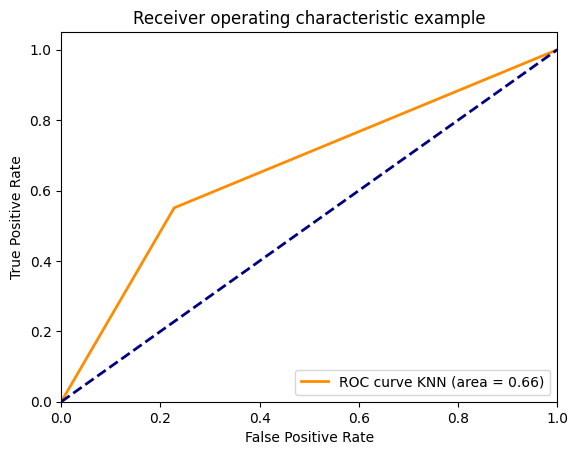

In [ ]:
drawROCCurves(['KNN'],[predictionsKNN],testLabels)

##### Ejercicio

Utilizando la función anterior genera la curva ROC de todos los clasificadores que has definido anteriormente.

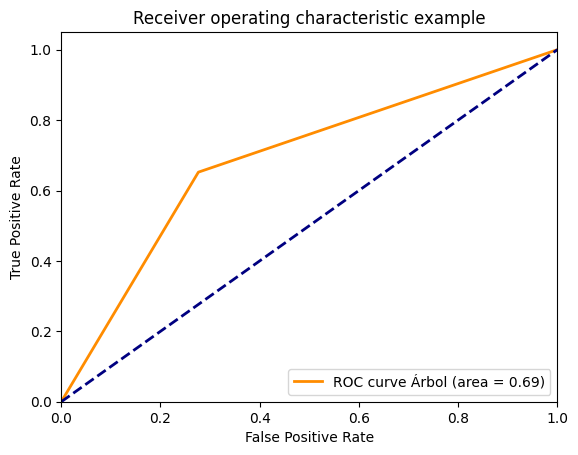

In [ ]:
drawROCCurves(['Árbol'],[predictionsArboles],testLabels)

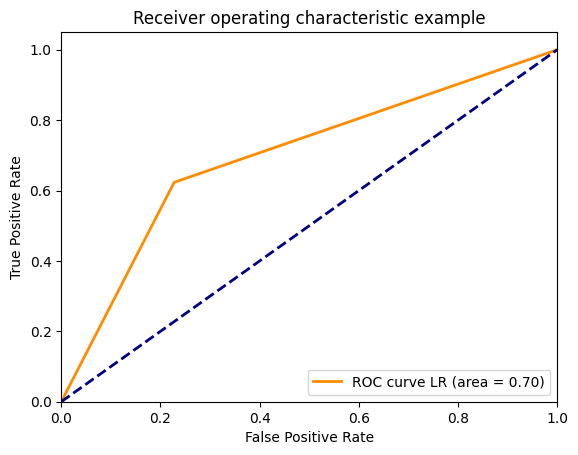

In [ ]:
drawROCCurves(['LR'],[predictionsLR],testLabels)

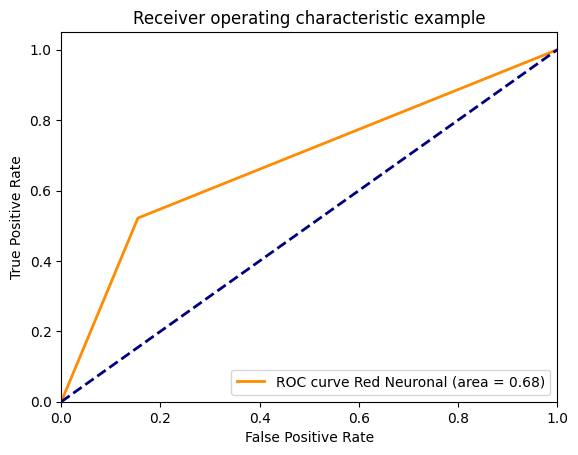

In [ ]:
drawROCCurves(['Red Neuronal'],[predictionsRN],testLabels)

Comparar